ODE with NN

In [1]:
import numpy as np 
import autograd.numpy as np
from autograd import grad 
import autograd.numpy.random as npr

from autograd.core import primitive

from matplotlib import pyplot as plt
%matplotlib inline

C:\Users\Christina\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Christina\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Christina\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
nx = 10 #diastimata
dx = 1. / nx #vima

In [9]:
dx

0.1

In [6]:
def A(x):
    '''
        Left part of initial equation
    '''
    return x + (1. + 3.*x**2) / (1. + x + x**3)


def B(x):
    '''
        Right part of initial equation
    '''
    return x**3 + 2.*x + x**2 * ((1. + 3.*x**2) / (1. + x + x**3))


def f(x, psy):
    '''
        d(psy)/dx = f(x, psy)
        This is f() function on the right
    '''
    return B(x) - psy * A(x)


def psy_analytic(x):
    '''
        Analytical solution of current problem
    '''
    return (np.exp((-x**2)/2.)) / (1. + x + x**3) + x**2

In [18]:
x_space = np.linspace(0.0, 1.0, 10)  
x_space

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

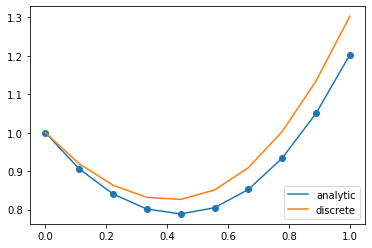

In [19]:
x_space = np.linspace(0.0, 1.0, num= nx)    
y_space = psy_analytic(x_space)
psy_fd = np.zeros_like(y_space)
psy_fd[0] = 1. # IC

for i in range(1, len(x_space)):
    psy_fd[i] = psy_fd[i-1] + B(x_space[i]) * dx - psy_fd[i-1] * A(x_space[i]) * dx
  
plt.figure()
plt.plot(x_space, y_space) 
plt.plot(x_space, psy_fd)
plt.legend(["analytic", "discrete"], loc ="lower right")
plt.scatter(x_space, y_space)
plt.show()

NN:

In [20]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))


def neural_network(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])


def d_neural_network_dx(W, x, k=1):
    return np.dot(np.dot(W[1].T, W[0].T**k), sigmoid_grad(x))


def loss_function(W, x):
    loss_sum = 0.
    for xi in x:
        net_out = neural_network(W, xi)[0][0]
        psy_t = 1. + xi * net_out
        d_net_out = d_neural_network_dx(W, xi)[0][0]
        d_psy_t = net_out + xi * d_net_out
        func = f(xi, psy_t)       
        err_sqr = (d_psy_t - func)**2

        loss_sum += err_sqr
    return loss_sum

In [21]:
W = [npr.randn(1, 10), npr.randn(10, 1)]
lmb = 0.001

# x = np.array(1)
# print neural_network(W, x)
# print d_neural_network_dx(W, x)

for i in range(1000):
    loss_grad =  grad(loss_function)(W, x_space)
    
#     print loss_grad[0].shape, W[0].shape
#     print loss_grad[1].shape, W[1].shape
    
    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]
    
#     print loss_function(W, x_space)

0.23214658899322999
[array([[-1.03218864,  0.89924939,  0.09868593, -1.85426555, -1.55372087,
        -2.3243967 ,  0.85382   ,  0.29045504,  0.93857115,  0.18283589]]), array([[-0.5489428 ],
       [ 0.57316292],
       [-0.15348498],
       [-1.64592328],
       [-0.66309129],
       [-0.17434661],
       [ 0.99942809],
       [-1.19256993],
       [ 0.23439061],
       [ 0.23551021]])]


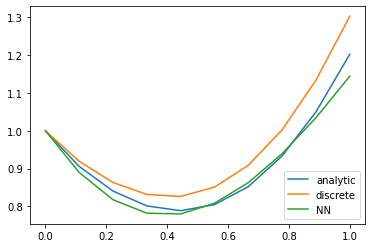

In [25]:
print(loss_function(W, x_space))
res = [1 + xi * neural_network(W, xi)[0][0] for xi in x_space] 

print (W)

plt.figure()
plt.plot(x_space, y_space) 
plt.plot(x_space, psy_fd)
plt.plot(x_space, res)
plt.legend(["analytic", "discrete","NN"], loc ="lower right")
plt.show()